# Robotic Systems I (ECE-DK808)

## Electrical and Computer Engineering Department, University of Patras Greece

**Instructor:** Konstantinos Chazilygeroudis (costashatz@upatras.gr)

## Lab 2

### Car-like Mobile Robot

We have the following car-like mobile robot:

<img src="car.png" width="300px"/>

The robot is moving on the 2D plane and has the following state: $\boldsymbol{x} = [\theta, x, y]^T$.

We can control the car by steering the wheel $\delta$ and generating driving velocity $v$ (e.g. via the pedal). It holds that $-\frac{\pi}{3}\leq\delta\leq\frac{\pi}{3}$, and $\boldsymbol{u} = \begin{bmatrix}v\\\delta\end{bmatrix}$. The car has length $L$.

The kinematic equations are given by:

$\dot{\boldsymbol{x}} = \begin{bmatrix}\frac{v}{L}\tan\delta\\v\cos\theta\\v\sin\theta\end{bmatrix}$

The task of this lab is to model the system and write an appropriate controller.

In [15]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting
from matplotlib.patches import Rectangle, Circle # for visualizing the robot and the obstacles
import copy

In [16]:
# First let's define the kinematics
L = 2.

def car(x, u):
    ### TO-DO: Write the kinematics $\dot{x} = f(x,u)$
    theta = x[0]
    v = u[0]
    delta = u[1]
    
    x_dot = np.array([v/L * np.tan(delta),
                        v * np.cos(theta),
                        v * np.sin(theta)])
    return x_dot   
    ### ANSWER: Insert code here
    ### END of ANSWER

In [17]:
x0 = np.array([[0., 0., 0.]]).T
u0 = np.array([[1.], [1.]])

dx0 = car(x0, u0)

assert(np.isclose(dx0[0], np.tan(1.)/2.))
assert(np.isclose(dx0[1], 1.))
assert(np.isclose(dx0[2], 0.))


In [18]:
# Now let's do some simulations to verify that this is correct
### TO-DO: Write a control that makes the car go straight forward. Store the command in a variable named 'u'.
u = np.array([[1.], [0.]])
### ANSWER: Insert code here
### END of ANSWER

# Let's do a simulation loop
dt = 0.1
T = 4.
K = int(T/dt) + 1

x = np.array([[0., -2., 0.]]).T # Let's start in (0,-2,0)
states = [x]
for k in range(K):
    ### TO-DO: Write a simple Euler integration step (using the `car` function). The next state (x_{k+1}) should replace the 'x' variable. Aka, x = f_{discrete}(x, u).
    ### ANSWER: Insert code here
    x = x + car(x,u) * dt
    ### END of ANSWER
    states.append(x)

In [19]:
assert(np.isclose(states[1][1, 0], -1.9))
assert(np.isclose(states[-1][1, 0], 2.1))


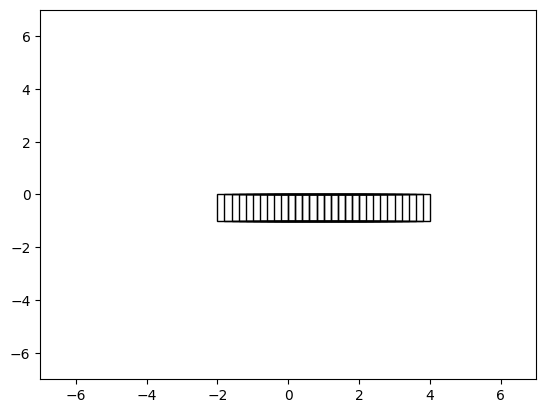

In [20]:
# Let's visualize the trajectory
def visualize_trajectory(states):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    def rot(theta):
        return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    
    for p in states[::2]:
        # compute positions
        bpb = np.array([[0, -L/2.]]).T
        bpw = rot(p[0, 0]) @ bpb + p[1:, :]
    
        rect = Rectangle((bpw[0, 0], bpw[1, 0]), L, L/2., edgecolor = 'black', fill=False, angle=p[0, 0] * 180. / np.pi)
        # add rectangle to plot
        ax.add_patch(rect)
    
    # Set the limits for the environment
    plt.xlim(-7, 7);
    plt.ylim(-7, 7);

visualize_trajectory(states)

**Now let's change the control to a turning one.** In particular, we would like the car to drive the car with a velocity of $v = 1$ and a turning angle of $\frac{\pi}{5}$.

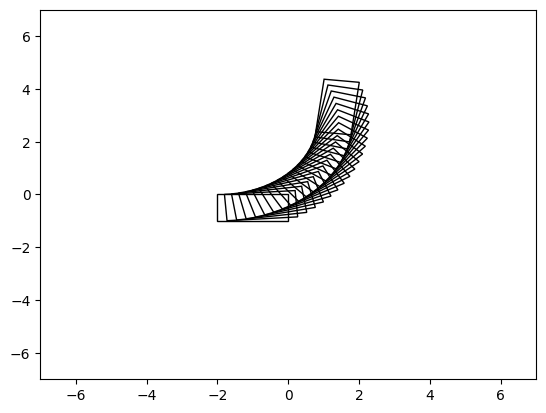

In [21]:
### TO-DO: Write a control that makes the car do the above mentioned movement. Store the command in a variable named 'u'.
### ANSWER: Insert code here
u = np.array([[1.], [np.pi/5]])
### END of ANSWER

# Let's do a simulation loop
dt = 0.1
T = 4.
K = int(T/dt) + 1

x = np.array([[0., -2., 0.]]).T # Let's start in (0,-2,0)
states = [x]
for k in range(K):
    ### TO-DO: Write a simple Euler integration step. Copy paste from the previous question. Use your new control!
    ### ANSWER: Insert code here
    x = x + car(x,u) * dt
    ### END of ANSWER
    states.append(x)

visualize_trajectory(states)

In [22]:
assert(np.isclose(states[1][2, 0], 0.))
assert(np.isclose(states[1][1, 0], -1.9))
assert(np.isclose(states[1][0, 0], 0.03632713))

assert(np.isclose(states[-1][2, 0], 2.47886711))
assert(np.isclose(states[-1][1, 0], 0.78928613))
assert(np.isclose(states[-1][0, 0], 1.48941218))


Now let's try to make the car go to a target!

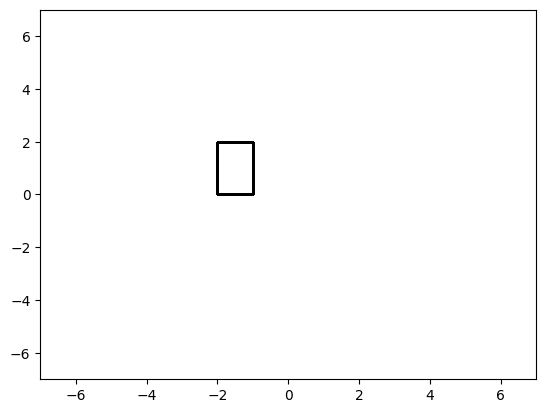

In [23]:
# Now let's make a simulation where the car needs to reach to a target location

# Let's do a simulation loop
dt = 0.1
T = 12. ### TO-DO: You can adapt this as you wish
K = int(T/dt) + 1

### TO-DO: Select a viable target. Store in a variable named 'x_target' (numpy array).
### ANSWER: Insert code here
x_target = np.array([[0., 2., 2.]]).T
### END of ANSWER

# Initial position
x = np.array([[np.pi / 2., -2., 0.]]).T # Let's start in (π/2,-2,0)

states = [x]
for k in range(K):
    ### TO-DO: Compute the error. Store it in a variable named 'err'
    ### ANSWER: Insert code here
    ### END of ANSWER

    ### TO-DO: Compute a control signal based on the error. Store the final command in a variable named 'u'
    ### ANSWER: Insert code here
    ### END of ANSWER

    ### TO-DO: Write a simple Euler integration step. Copy paste from previous solutions.
    ### ANSWER: Insert code here
    ### END of ANSWER
    states.append(x)

visualize_trajectory(states)

**Note that it is super difficult to make a good controller for this car!** We will come back to this later in the course!

### Randomly exploring Rapid Trees (RRT)

RRT is a simple but effective algorithm for planning. It is a sampling based planning algorithm. A high level pseudocode is given below:

1. Initialize search tree with $\boldsymbol{x}_{\text{start}}$
2. $\textbf{while}$ *some stopping criteria are not met*
3. &nbsp;&nbsp;&nbsp;&nbsp;sample $\boldsymbol{x}_{\text{sample}}\sim\mathcal{X}$
4. &nbsp;&nbsp;&nbsp;&nbsp;find $\boldsymbol{x}_{\text{nearest}}\text{ nearest node of } \boldsymbol{x}_{\text{sample}} \text{ in tree}$
5. &nbsp;&nbsp;&nbsp;&nbsp;connect $\boldsymbol{x}_{\text{nearest}} \text{ to } \boldsymbol{x}_{\text{new}} \text{ in direction of } \boldsymbol{x}_{\text{sample}}$
6. &nbsp;&nbsp;&nbsp;&nbsp;$\textbf{if}\text{ success}$
7. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;add $\boldsymbol{x}_{\text{new}} \text{ to the tree with an edge from }\boldsymbol{x}_{\text{nearest}}$
8. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\textbf{if }\boldsymbol{x}_{\text{new}}\in\mathcal{X}_{\text{goal}}\text{ return SUCCESS}$
9. $\text{~return FAILURE}$

We have the following:

- We have a robot operating in 2D space, and that the robot is a 2D circle (a point with a fixed radius)
- The robot can move in any direction.
- We assume pure kinematic movement (aka, no modeling for wheels)

Let's implement RRT for our robot.

In [24]:
robot_radius = 0.3 # 0.3m radius

# First, some helpers
def numpy_to_tuple(xx):
    x = xx.reshape((-1, 1))
    return (x[0, 0], x[1, 0])

# And for the inverse
def tuple_to_numpy(t):
    return np.array([[t[0], t[1]]]).T

In [25]:
# Now we need to create a sampler!
def sample_state():
    ### TO-DO: Sample a state in [-5, 5] and return it
    ### ANSWER: Insert code here
    s = np.array([[np.random.uniform(-5, 5)], [np.random.uniform(-5, 5)]])
    
    return s
    ### END of ANSWER

# Now we need to find the nearest node of x in tree
def nearest(x, tree):
    ### TO-DO: Find the nearest node. Store it in a variable named 'near' (a numpy array). 'x' is a numpy array.
    ### ANSWER: Insert code here
    tree = sorted(tree) # initial tree is a 'set'
    near = np.array([[tree[0][0]], [tree[0][1]]])
    # near = np.array([[list(tree)[0][0]], [list(tree)[0][1]]])
    for t in tree:
        curr_node = np.array([[t[0]],
                              [t[1]]])
        curr_dist = np.linalg.norm(x - curr_node)
        min_dist = np.linalg.norm(x - near)
        
        if(curr_dist < min_dist):
            near = curr_node
    ### END of ANSWER
    return near

# Finally we need to connect two states
def connect(x_start, x_target):
    ### TO-DO: Connect the two states via a line, but with a maximum distance of 0.3m. Save the result in a variable named 'x_final' (numpy array)
    ### ANSWER: Insert code here
    max_dist = 0.3
    dist = np.linalg.norm(x_target - x_start)

    if dist <= max_dist:
        x_final = x_target
    else:
        x_final = x_start + max_dist * ((x_target - x_start)/dist) 
    ### END of ANSWER
    return x_final

def valid_state(x):
    # We do not allow states outside [-5., 5.]
    if (np.abs(x[1:]) > 5.).any():
        return False
    return True

In [26]:
for _ in range(50):
    assert((sample_state() <= 5.).all())
    assert((sample_state() >= -5.).all())

x_s = np.array([[0.], [0.]])
x_t = np.array([[1.], [0.]])
x_f = np.array([[0.3], [0.]])
x_t2 = np.array([[0.], [1.]])
x_f2 = np.array([[0.], [0.3]])
x_s2 = np.array([[2.], [2.3]])

my_tree = {(1., 1.), (2., 2.), (3., 3.), (4., 4.), (-1., -2.), (-3., -5)}

assert(np.isclose(connect(x_s, x_t), x_f).all())
assert(np.isclose(connect(x_s, x_t2), x_f2).all())


In [27]:
x_s = np.array([[0.], [0.]])
x_s2 = np.array([[2.], [2.3]])

my_tree = {(1., 1.), (2., 2.), (3., 3.), (4., 4.), (-1., -2.), (-3., -5)}
assert(np.isclose(nearest(x_s, my_tree), np.array([[1.], [1.]])).all())
assert(np.isclose(nearest(x_s2, my_tree), np.array([[2.], [2.]])).all())


In [28]:
eps = 1e-2

# Now let's make the RRT algorithm
def RRT(x_start, x_goal, max_iters = 1000):
    # Let's create a tree
    tree = {}
    tree[numpy_to_tuple(x_start)] = []
    for i in range(max_iters):
        ### TO-DO: Implement lines 3 and 4 of pseudocode
        ### ANSWER: Insert code here
        x_sample = sample_state()
        x_nearest = nearest(x_sample, tree)
        ### END of ANSWER
        if x_nearest is None: # Something bad happened
            continue
        ### TO-DO: Implement line 5 of pseudocode
        ### ANSWER: Insert code here
        x_new = connect(x_nearest, x_sample)
        ### END of ANSWER
        # we assume the path is always valid here, but check for the final state
        if not valid_state(x_new):
            continue
        # We need to check if this new point is already in the tree. If it is, we already know how to get there. So, we ignore it!
        x_new_nearest = nearest(x_new, tree)
        if np.linalg.norm(x_new - x_new_nearest) < eps:
            continue
        tree[numpy_to_tuple(x_new)] = []
        tree[numpy_to_tuple(x_nearest)].append(x_new)
        if np.linalg.norm(x_goal - x_new) < robot_radius:
            return True, tree
    return False, tree

In [29]:
np.random.seed(None) # reset seed
# Let's try it out
x_target = np.array([[-2., 3.]]).T # target at (-2, 3)

# Initial position
x_init = np.array([[-2., 0.]]).T # Let's start in (-2,0)

valid, tree = RRT(x_init, x_target, 1000)

print(valid, len(tree))

True 76


In [30]:
np.random.seed(1) # Set specific seed
valid, test_tree = RRT(x_init, x_target, 1)

all_nodes = list(test_tree.keys())

assert((-2., 0.) in all_nodes)
assert((-1.859277237626504, 0.2649473610926756) in all_nodes)
assert(len(all_nodes) == 2)
assert(valid == False)


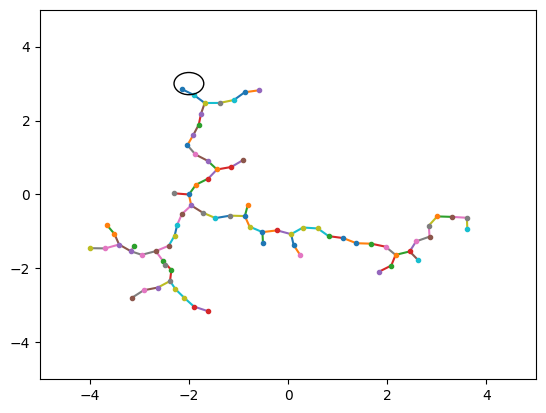

In [31]:
# Let's visualize the tree
fig = plt.figure()
ax = fig.add_subplot(111)

for s in tree:
    ax.plot(s[0], s[1], '.', zorder=2)

    for c in tree[s]:
        ax.plot([s[0], c[0, 0]], [s[1], c[1, 0]], zorder=1)

# Plot target
ax.add_patch(Circle([x_target[0, 0], x_target[1, 0]], radius=robot_radius, fill=False, zorder=2))

plt.ylim(-5., 5.);
plt.xlim(-5., 5.);

OK! Let's add some obstacles now.

The changes needed are in `connect` and `valid_state` as we need to be checking for collisions!

In [32]:
obstacles = [(0., 0., 1.), (0., -3., 1.), (-2., 4., 1.), (-4., -2., 0.5), (4., 3., 1.), (4., -4., 0.5)]  # (x,y,radius)

# Function that checks if a state collides with obstacles
def collide_obstacles(x):
    ### TO-DO: Write a function that checks for collisions with all obstacles. The function should return True if state 'x' is colliding, and False otherwise.
    ### ANSWER: Insert code here
    for o in obstacles:
        obstacle = np.array(o).reshape((3,1))
        o = np.array([obstacle[0],
                      obstacle[1]])  
        if(np.linalg.norm(x - o) < obstacle[2] + robot_radius): return True
    return False
    ### END of ANSWER

In [33]:
assert(collide_obstacles(np.array([[1.], [1.]])) == False)
assert(collide_obstacles(np.array([[1.], [0.]])) == True)
assert(collide_obstacles(np.array([[0.8], [0.8]])) == True)
assert(collide_obstacles(np.array([[0.95], [0.95]])) == False)


In [51]:
# Let's redefine the two f] + robot_radiusunctions
def connect(x_start, x_target):
    ### TO-DO: Connect the two states via a line, but with a maximum distance of 0.3m. Make sure that the line is not colliding with an obstacle.
    ### TO-DO: In particular, we want to move on line (starting from x_start) and stop if we reach the maximum distance or moving forward will result in a collision.
    ### TO-DO: You should split the distance from x_start to x_target into K = 20 steps
    ### TO-DO: Store the final point in a variable named 'x_final'
    ### ANSWER: Insert code here
    dist = np.linalg.norm(x_target - x_start)
    K = 20.
    dx = min(dist, 0.3)/K
    
    x = x_start
    for i in range(int(K)):
        x_new = x + dx * ((x_target - x_start)/dist) 
        
        if((collide_obstacles(x_new)) or (np.linalg.norm(x_new - x_start) > 0.3)):
            x_final = x
            break
        
        x = x_new
        x_final = x_new
    ### END of ANSWER
    return x_final

def valid_state(x):
    # We do not allow states outside [-5., 5.] and if they are colliding
    if (np.abs(x[1:]) > 5.).any() or collide_obstacles(x):
        return False
    return True

In [52]:
x_s = np.array([[1.1], [1.1]])
x_t = np.array([[0.], [0.]])
x_f = np.array([[0.91968777], [0.91968777]])
x_t2 = np.array([[-1.], [-2.]])
x_f2 = np.array([[0.95698372], [0.88888073]])

assert(np.isclose(connect(x_s, x_t), x_f).all())
assert(np.isclose(connect(x_s, x_t2), x_f2).all())


In [53]:
# Let's try it out
x_target = np.array([[2., 1.]]).T # target at (2, 1)

# Initial position
x_init = np.array([[-2., 0.]]).T # Let's start in (-2,0)

valid, tree = RRT(x_init, x_target, 1000)

print(valid, len(tree))

True 121


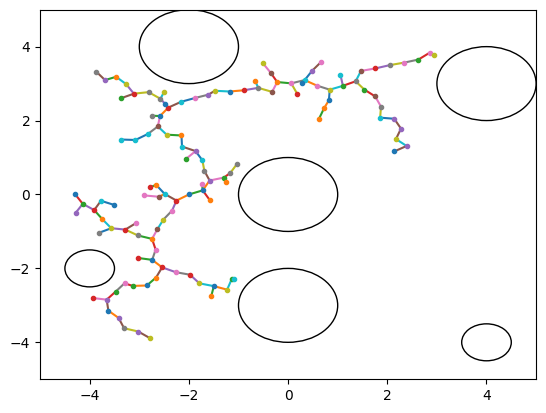

In [54]:
# Let's visualize the tree
fig = plt.figure()
ax = fig.add_subplot(111)

for s in tree:
    ax.plot(s[0], s[1], '.', zorder=2)
    # ax.add_patch(Circle([s[0], s[1]], radius=robot_radius, fill=False, zorder=2))

    for c in tree[s]:
        ax.plot([s[0], c[0, 0]], [s[1], c[1, 0]], zorder=1)

for o in obstacles:
    ax.add_patch(Circle([o[0], o[1]], radius=o[2], fill=False, zorder=3))

plt.ylim(-5., 5.);
plt.xlim(-5., 5.);